# Projet : analyse de data

## L'économie française peut-elle survivre sans le tourisme ?

````{admonition}
##### Le but de cette étude va être d'étudier différents paramètres d'influence sur le tourisme afin de trouver certains relations de causalité entre densité de tourisme et paramètre du pays en question. 

##### Comme notre tableau se compose uniquement de chiffre, on va tracer beaucoup de graphiques (sans faire énormément de probabilités/pourcentages comme on aurait pu le faire avec la version du cours sur le titanic, où on peut demander le pourcentage de femmes en première classe etc... qui semble moins adaptés et pertinentes pour le cadre d'étude fixé sur les correlations, qui elles nécessitent beaucoup de courbes).
````

Quentin BONNET

Nathan BOUTHORS

Eliott FAYOLLE

Baptiste MICHAUD

Yvon PEREZ

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('stats_tourisme.csv')
df.head()

,Pays,Dépense étrangère dans le pays pour le tourisme ($US2021),Dépense internationale pour les voyages à l'étranger ($US2021),Hôtes locaux (hôtels),Hôtes étrangers (hôtels),Nombre moyen de nuits passées par les touristes étrangers,Nombre de voyages des habitants dans un autre endroit du pays par an,Nombre de passagers aériens,Touristes annuels,Nombre d'employés dans le tourisme pour 1000 habitants,Nombre de départs à l'étranger par an pour 1000 habitants,Nombre d'employés dans la restauration pour 1000 habitants,Nombre de voyages d'une seule journée depuis l'étranger pour 1000 habitants,PIB / habitant,Population,PIB,Part du tourisme dans le PIB
0,Albania,5.166606e+09,1876012300,430000.0,736000.0,3.0,NaN,307741.0,6128000.0,18.0,NaN,NaN,96.4,13653,2402113,32796048789,15.753746
1,Algeria,NaN,676212350,3719000.0,NaN,2.0,NaN,6752002.0,NaN,7.4,132.4,NaN,NaN,11627,46700000,542980900000,0.000000
2,Argentina,NaN,8320167400,16289000.0,NaN,2.0,1.0,19461376.0,7400000.0,28.0,202.7,11.3,NaN,22072,47067441,1038872557752,0.000000
3,Australia,4.483945e+10,36791038000,40088000.0,4515000.0,NaN,4.6,76850600.0,NaN,27.5,NaN,10.6,NaN,49421,27122411,1340416674031,3.345188
4,Austria,2.853797e+10,12283111000,11144000.0,22662000.0,3.0,1.5,46476600.0,31884000.0,23.2,1340.2,NaN,NaN,5577,9179693,51195147861,55.743500


## Introduction : Le tourisme dans le monde

````{admonition}
##### Depuis la révolution industrielle, le tourisme tel que nous le connaissons prends vie. A l'aide des nouveaux moyens de locomotion (train puis bateaux à vapeur),relier deux destinations devient dès lors envisagable. Voyager apparaît dès lors comme un luxe, réservé à une élite. Le tourisme prend son essor durant la deuxième moitiée du XXe siècle avec l'avenement de l'aviation commercial. Cette introduction se base sur le toursime en 2019.

Notre étude se base sur les données récupérées sur la page https://ourworldindata.org/tourism.
Nous nous intéressons à la place du tourisme dans l'économie et la culture de 59 pays des 5 continents. Nous avons privilégié les pays les plus peuplés qui comptaient suffisamment de données disponibles.

Pour ce qui est de la gestion des valeurs manquantes, on travaillera au cas par cas à les enlever en créant des dataframe intermédiaires en fonction des grandeurs étudiées, car si on trie tout dès le départ sur toutes les cases, on risque de ne garder que quelques (voire aucun) pays complets sur toutes les données.

La liste des pays :

In [9]:
df['Pays']

0            Albania
1            Algeria
2          Argentina
3          Australia
4            Austria
5            Belgium
6             Brazil
7           Bulgaria
8           Cameroon
9             Canada
10         CapeVerde
11             Chile
12             China
13          Colombia
14           Croatia
15            Cyprus
16           Czechia
17           Denmark
18             Egypt
19           Estonia
20           Finland
21            France
22           Georgia
23           Germany
24            Greece
25           Hungary
26           Iceland
27             India
28         Indonesia
29           Ireland
30            Israel
31             Italy
32             Japan
33            Latvia
34        Luxembourg
35             Malta
36            Mexico
37           Morocco
38       Netherlands
39    NorthMacedonia
40            Norway
41              Peru
42       Philippines
43            Poland
44          Portugal
45           Romania
46            Russia
47       Saud

## Valeur manquante 

In [10]:
print(df.isnull().sum())

Pays                                                                            0
Dépense étrangère dans le pays pour le tourisme ($US2021)                       7
Dépense internationale pour les voyages à l'étranger ($US2021)                  0
Hôtes locaux (hôtels)                                                           9
Hôtes étrangers (hôtels)                                                       16
Nombre moyen de nuits passées par les touristes étrangers                      14
Nombre de voyages des habitants dans un autre endroit du pays par an           21
Nombre de passagers aériens                                                     3
Touristes annuels                                                               8
Nombre d'employés dans le tourisme pour 1000 habitants                         19
Nombre de départs à l'étranger par an pour 1000 habitants                      18
Nombre d'employés dans la restauration pour 1000 habitants                     26
Nombre de voyage

### Pour débuter, regardons les pays envoyant le plus de touristes à l'étranger. On se limite aux 7 premiers pays. On s'attend à retrouver des pays peuplés, et riches.

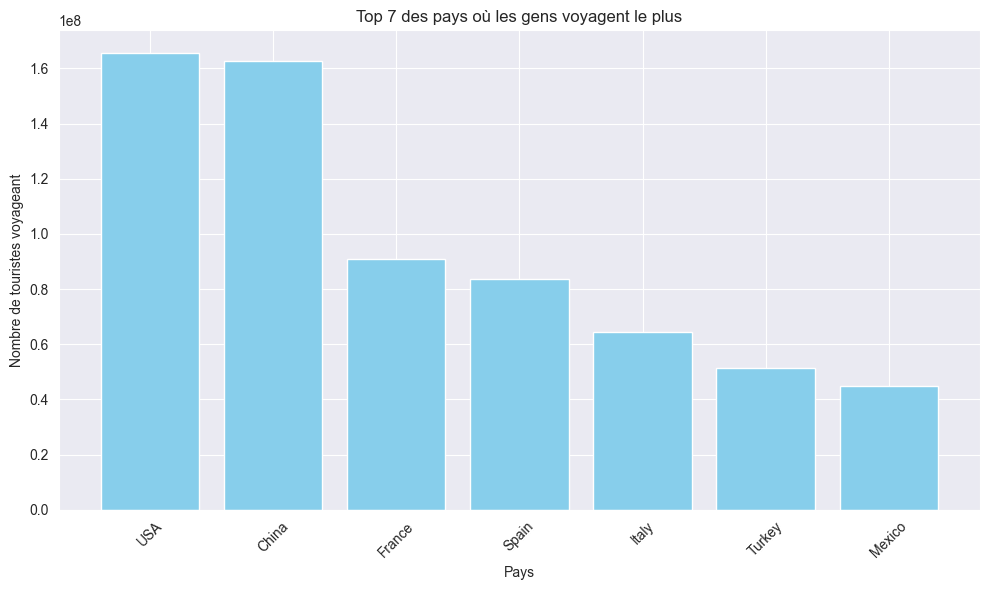

In [49]:
# Filtrer les lignes où le nombre de touristes annuels est non nul et non NaN, puis trier par ordre décroissant
top_countries = df[['Pays', 'Touristes annuels']].dropna()
top_countries = top_countries.sort_values(by='Touristes annuels', ascending=False).head(7)

# Tracer le bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_countries['Pays'], top_countries['Touristes annuels'], color='skyblue')
plt.xlabel('Pays')
plt.ylabel('Nombre de touristes voyageant')
plt.title('Top 7 des pays où les gens voyagent le plus')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

##### Maintenant, on va regarder l'influence du PIB / habitant sur le tourisme au départ. En effet, nous avons vu en introduction que le tourisme (le fait de partir en voyage) était réservé aux plus aisés, est-ce toujours le cas ? On se limite à un bar-chart avec les 7 pays avec le plus de touristes au départ et ceux avec le moins de tourisme au départ.

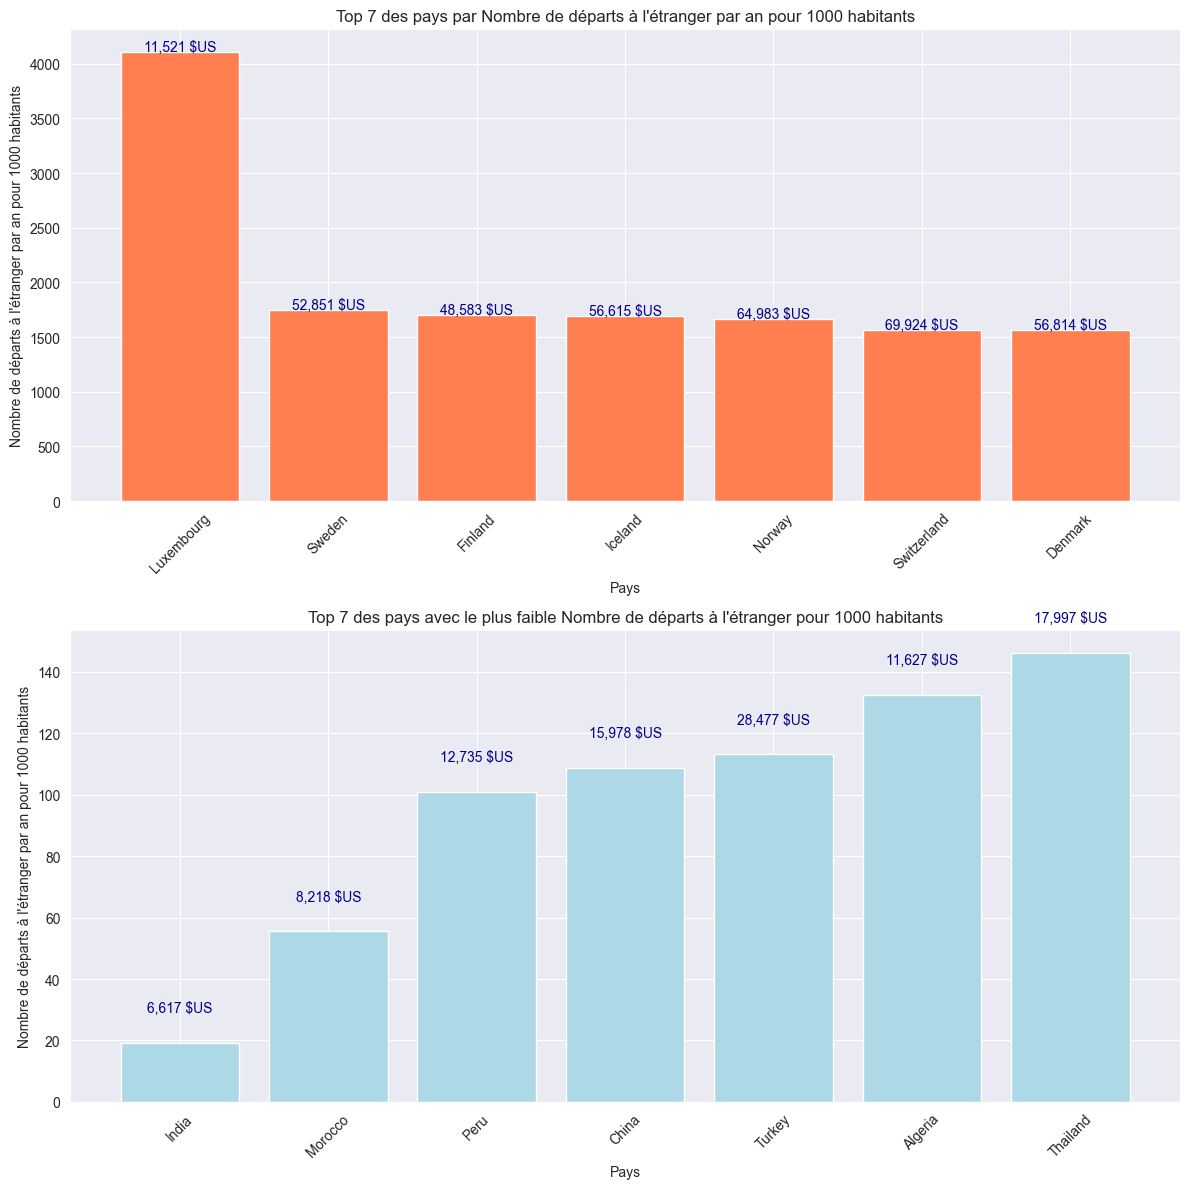

In [50]:
# Trier les données pour les 7 premières et 7 dernières valeurs
filtered_df = df[['Pays', "Nombre de départs à l'étranger par an pour 1000 habitants", "PIB / habitant"]].dropna()
top_departures = filtered_df.sort_values(by="Nombre de départs à l'étranger par an pour 1000 habitants", ascending=False).head(7)
bottom_departures = filtered_df.sort_values(by="Nombre de départs à l'étranger par an pour 1000 habitants", ascending=True).head(7)

# Configuration de la figure
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Graphique des 7 pays avec le plus grand nombre de départs
axs[0].bar(top_departures['Pays'], top_departures["Nombre de départs à l'étranger par an pour 1000 habitants"], color='coral')
axs[0].set_title("Top 7 des pays par Nombre de départs à l'étranger par an pour 1000 habitants")
axs[0].set_xlabel('Pays')
axs[0].set_ylabel("Nombre de départs à l'étranger par an pour 1000 habitants")
axs[0].tick_params(axis='x', rotation=45)

# Annoter chaque barre avec le PIB / habitant
for i, (pib, departure) in enumerate(zip(top_departures['PIB / habitant'], top_departures["Nombre de départs à l'étranger par an pour 1000 habitants"])):
    axs[0].text(i, departure + 10, f'{pib:,.0f} $US', ha='center', fontsize=10, color='darkblue')

# Graphique des 7 pays avec le plus faible nombre de départs
axs[1].bar(bottom_departures['Pays'], bottom_departures["Nombre de départs à l'étranger par an pour 1000 habitants"], color='lightblue')
axs[1].set_title("Top 7 des pays avec le plus faible Nombre de départs à l'étranger pour 1000 habitants")
axs[1].set_xlabel('Pays')
axs[1].set_ylabel("Nombre de départs à l'étranger par an pour 1000 habitants")
axs[1].tick_params(axis='x', rotation=45)

# Annoter chaque barre avec le PIB / habitant
for i, (pib, departure) in enumerate(zip(bottom_departures['PIB / habitant'], bottom_departures["Nombre de départs à l'étranger par an pour 1000 habitants"])):
    axs[1].text(i, departure + 10, f'{pib:,.0f} $US', ha='center', fontsize=10, color='darkblue')

plt.tight_layout()
plt.show()

````{admonition}
En conclusion, les observations faites lors de la fin de la révolution industrielle sont toujours avérées : il faut être riche pour voyager.

### L'importance du tourisme pour les différents pays du monde

On va regarder si tous les pays ont des caractéristiques similaires vis-à-vis du tourisme.

On trace pour chaque pays le nombre de touristes qui sont venus au cours de l'année 2019 en fonction du nombre d'habitants du pays. L'axe des abscisses (correspondant à la population) est en échelle logarithmique pour améliorer la visibilité.

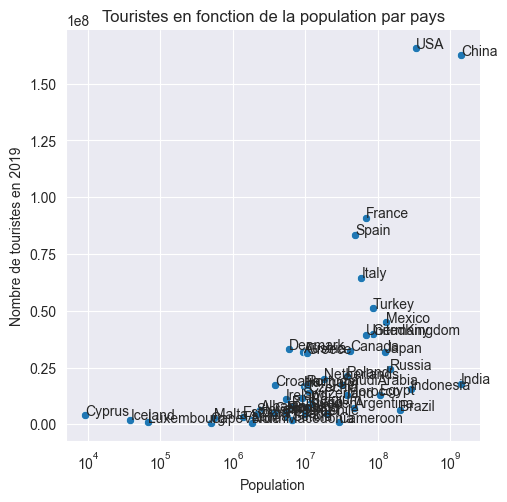

In [51]:
pays_par_touristes = df.loc[df['Touristes annuels'].notna(), ['Pays', 'Touristes annuels', 'Population']]

graphique = sns.relplot(data = pays_par_touristes, x = 'Population', y = 'Touristes annuels', kind = 'scatter')
graphique.set(xscale="log", xlabel = "Population", ylabel = "Nombre de touristes en 2019", title = "Touristes en fonction de la population par pays")

#Ici on va définir une fonction pour tout le reste de l'étude qui permettra de légender les points
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(pays_par_touristes['Population'],pays_par_touristes['Touristes annuels'], pays_par_touristes['Pays'], plt.gca())


````{admonition}
On constate que tous les pays ne se valent pas : notamment la France, l'Espagne, l'Italie et les Etats-Unis accueillent beaucoup d'étrangers par rapport à leur nombre d'habitants. Il semblerait donc que le tourisme soit un domaine important pour ces pays.

### Importance économique du tourisme

Comparaison des sommes investies, du nombre d'employés

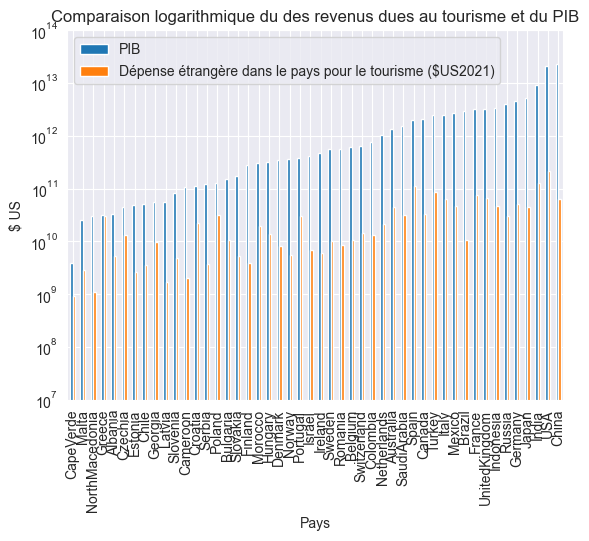

In [52]:
depenses = df.loc[df["Dépense étrangère dans le pays pour le tourisme ($US2021)"].notna() & df["PIB / habitant"].notna(), ["Pays","Dépense étrangère dans le pays pour le tourisme ($US2021)","PIB / habitant","Population","PIB", "Part du tourisme dans le PIB"]]
depenses=depenses[depenses["Pays"]!="Luxembourg"]
depenses=depenses[depenses["Pays"]!="Iceland"]
depenses=depenses[depenses["Pays"]!="Austria"]
depenses=depenses[depenses["Pays"]!="Cyprus"]
depenses = depenses.sort_values(by="PIB")
graph=depenses.plot.bar(x="Pays", y=["PIB","Dépense étrangère dans le pays pour le tourisme ($US2021)"], log=True, rot=90)
graph.set(ylim=(10**7,10**14), title="Comparaison logarithmique du des revenus dues au tourisme et du PIB", ylabel="$ US", xlabel="Pays")
plt.show()

On a tracé ici, pour chaque pays, la comparaison entre le PIB et le revenu dû aux tourisme étranger. Attention, il s'agit d'une echelle logarithmique qui permet d'apprecier un resultat uniquement qualitatif.
On remarque l'importance de ce secteur pour beaucoup de pays notamment les pays les moins riches pour lesquels le tourisme représente une plus grande part de leur économie.

On peut souligner cette remarque à l'aide du graphique suivant qui represente la part des revenues dû au secteur du tourisme étranger dans le PIB des pays (en %). En considérant que les pays sont toujours ordonnés dans l'ordre croissant des PIB.

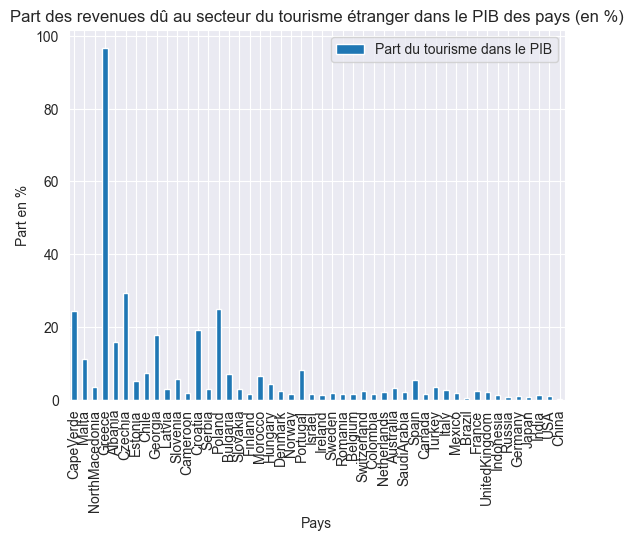

In [53]:
graph2= depenses.plot.bar(x="Pays", y="Part du tourisme dans le PIB", rot=90)
graph2.set(title="Part des revenues dû au secteur du tourisme étranger dans le PIB des pays (en %)", xlabel="Pays", ylabel="Part en %")
plt.show()

Il convient également de noter à quel point le tourisme est un secteur important pour monsieur, madame tout le monde, tant le nombre d'employés du domaine est important comme le montre le graphique suivant. 

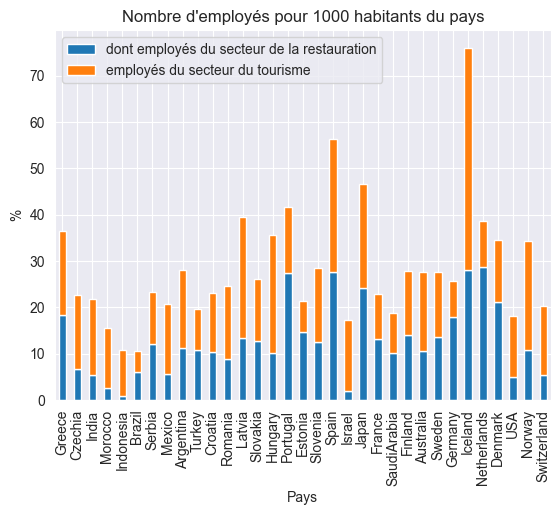

In [54]:
travail=df.loc[df["Nombre d'employés dans le tourisme pour 1000 habitants"].notna() & df["Nombre d'employés dans la restauration pour 1000 habitants"].notna(), ["Pays","Nombre d'employés dans la restauration pour 1000 habitants","Nombre d'employés dans le tourisme pour 1000 habitants","Population","PIB","PIB / habitant"]]
travail["diff"]=travail["Nombre d'employés dans le tourisme pour 1000 habitants"]-travail["Nombre d'employés dans la restauration pour 1000 habitants"]
travail=travail.sort_values(by="PIB / habitant")
travail.plot.bar(x="Pays", y=["Nombre d'employés dans la restauration pour 1000 habitants","diff"], stacked=True, label=["dont employés du secteur de la restauration","employés du secteur du tourisme"], xlabel="Pays", title="Nombre d'employés pour 1000 habitants du pays", ylabel= "%")
plt.show()

On voit donc ici l'impact clair de l'industrie du tourisme et du voyage pour les pays les plus riche également. En effet, les pays sont ici rangés par ordre croissant de PIB / habitant, montrant que ce secteur est primordial pour beaucoup d'habitants des pays les plus riches comme les plus pauvre et permet à une proportion non négligeable d'individus de vivre et de gagner leurs vies.

````{admonition}
Pour résumer, le tourisme est une source importante de valeur ajoutée pour beaucoup de pays, que ce soit dans le PIB ou dans le taux d'emploi

Les pays les plus pauvres ou plus petits étant les plus
dépendant de cette industrie considérant la part importante que cette dernière occupe dans leur PIB. 
Cependant, on vient de montrer que les pays riches sont également dépendant de cette industrie à l'echelle de l'individu considérant le nombre de personnes dépendant directement du toursime.


#### Nous avons vu au travers de ces exemples que le tourisme est un facteur économique important du pays, notamment pour la France qui en tire 20% de son emploi avec la restauration et 2% de son PIB (même part du PIB que les dépenses énergétiques). 

````{admonition}
#### On peut alors s'interroger comment influencer ce secteur et sur quels paramètres on peut jouer.

### Capacité d'accueil et services : un pays adapté au tourisme ?

S'il semble évident de dire que le la popularité de certains monuments peut pousser les touristes à venir dans un pays ou même de dire que Venise est célèbre pour la Saint Valentin, il en est difficile de matérialiser ces aspects culturels/d'opinions dans un tableur. 

On va donc chercher trouver d'autres raisons, et notamment en essayant de s'intéresser aux services proposés par le pays en question. 

Nous allons donc regarder le nombre de touriste divisé par la population afin d'avoir des statistiques cohérentes de comparaison car plus un pays est gros, plus il va rapporter des touristes, sans pour autant être un pays touristique. L'axe des ordonnées représentera toujours les touristes/la population

#### Dans un premier temps on peut essayer de comparer les touristes au PIB par habitant, indicateur de la richesse et de la qualité de vie d'un pays

In [55]:
sns.set_style('darkgrid') #pour un meilleur fond

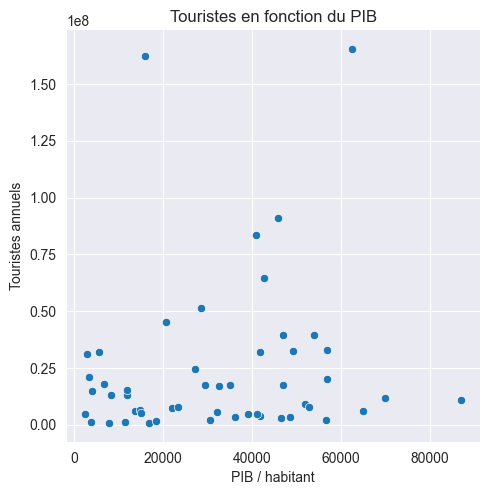

In [56]:
masque = (df['Touristes annuels'].notna()) & (df['PIB / habitant'].notna())
touristes_par_PIB = df.loc[masque, ['Pays', 'Touristes annuels', 'PIB / habitant']]

graphique1 = sns.relplot(data=touristes_par_PIB, x='PIB / habitant', y='Touristes annuels')
graphique1.set(title = "Touristes en fonction du PIB");


De ce qu'on peut voir, il ne semble pas y avoir de corrélation importante entre PIB du pays par hab et voyageurs, sûrement car les gens voyagent pour le paysage et la culture plutôt que la richesse du pays en question (peut-être aussi un facteur d'accessibilité au contraire : un pays cher n'est pas accesssible à tous).

Cependant si on exclue les points qui restent environ constants, on voit qu'au dessus de 0.25e8 touristes on a des valeurs qui avaient tendance à augmenter. Ici encore une fois on observe que la France possède un certain succès malgré un PIB/hab moyen parmi les autres habitants, en effet : 

In [57]:
pib = df.loc[df['PIB / habitant'].notna(), ['Pays', 'PIB / habitant']]
pib = pib.set_index('Pays')
print('PIB/hab en France :', pib.loc['France']['PIB / habitant'])
print('PIB/hab en moyenne :', int(np.round(pib.mean().iloc[0], 0)), '+-', int(np.round(pib.std().iloc[0], 0)));

PIB/hab en France : 45923
PIB/hab en moyenne : 30407 +- 20229


Comme on peut le voir la France se situe dans l'écart-type au premier ordre, donc dans la tranche de 68% des pays, mais pour autant elle est le 3ème pays le plus touristique. 

````{admonition}
En résumé la richesse du pays ne semble pas avoir d'influence apaprente avec le taux de touristes. Voyons voir les autres paramètres qui pourraient influencer ce résultat.

#### Dans un second temps on peut essayer de comparer les touristes aux hôtels, essentiels à la présence touristique

On commence par voir une veu d'ensemble de la répartition des touristes pas nombre d'hôtes selon leur origine

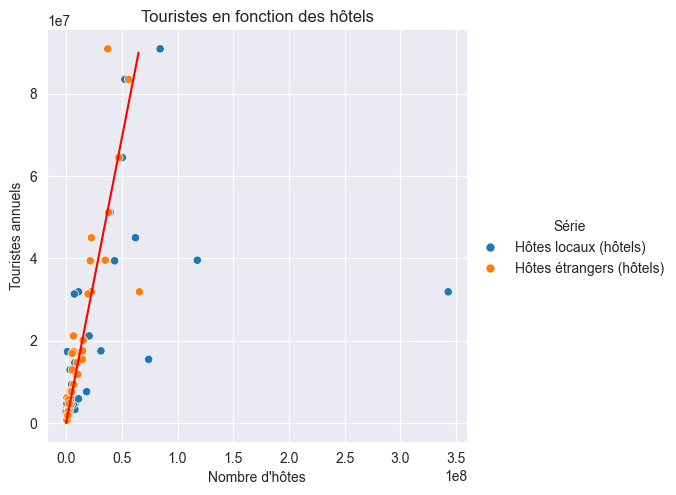

In [58]:
masque = (df['Hôtes locaux (hôtels)'].notna()) & (df['Hôtes étrangers (hôtels)'].notna())
touristes_par_hotel = df.loc[masque, ['Pays', 'Touristes annuels', 'Hôtes locaux (hôtels)', 'Hôtes étrangers (hôtels)']]


#On veut représenter dans le même graphe mais avec couleurs différentes
df_hotel = pd.melt(touristes_par_hotel, id_vars=['Touristes annuels'], value_vars=['Hôtes locaux (hôtels)', 'Hôtes étrangers (hôtels)'], 
                    var_name='Série', value_name='Valeur')

graphique2 = sns.relplot(data=df_hotel, x='Valeur', y='Touristes annuels', hue='Série')
graphique2.set( xlabel = "Nombre d'hôtes", title = "Touristes en fonction des hôtels");
#sinon le Japon empêche de bien visualiser le reste
#mais il vaut 3.5e8 hotels pour 2.5e7 touristes

#Regression
plt.plot([0,0.65e8], [0, 9e7], 'r');

Comme on peut le voir on a bien une relation presque linéaire entre les deux, ce qui parait cohérent car plus on a de touristes plus il faut les loger. On pourra donc corréler le nombre d'hôtes au nombre d'hôtel ou à l'accessibilité des hôtels car s'il y a beaucoup de clients : soit il y a beaucoup d'hôtels, soit ceux-ci sont facilement accessibles ; mais dans les deux cas ça reste un atout pour le pays, on ne s'embarassera pas dans la suite de les confondre.

Cela semble être une relation covariante car plus il y a de touristes plus il y a d'hôtels mais aussi plus il y a d'hôtels plus on attire de touristes car le choix est possible, les prix et la qualité joueront sur la décision de touristes à venir ou non. Des hôtels hors de prix en petit nombre ne permettront qu'à des minorités de venir tandis qu'un large panel de gamme de prix/qualité conviendra à plus grand nombre.

Comme dans notre série de donnée on a les hôtes étrangers et locaux on va prendre la somme des deux, ce qui donnera un ordre d'idée des hôtels disponibles par pays

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


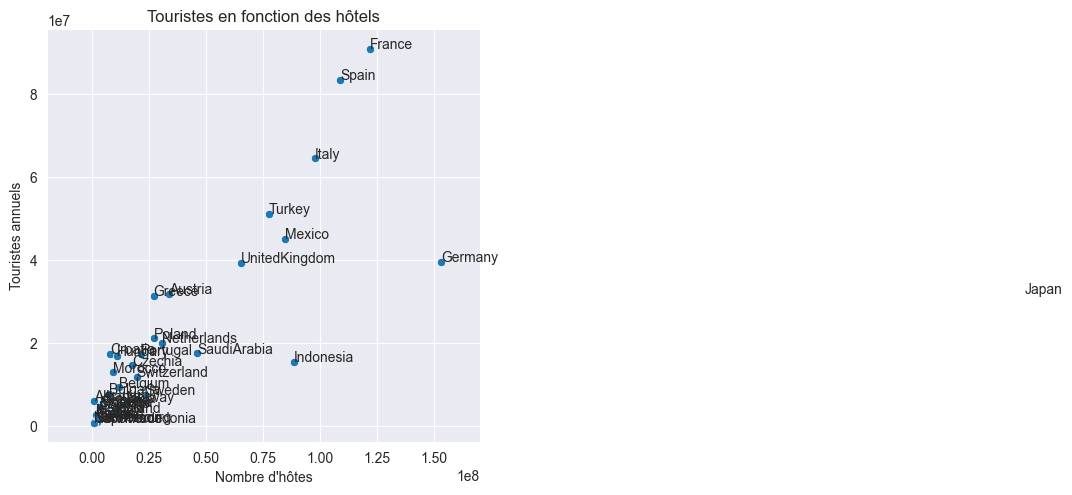

In [59]:
touriste_par_hotel_total = touristes_par_hotel #on va rajouter une colonne du total
touriste_par_hotel_total["Nombre total d'hôtes"] = touriste_par_hotel_total['Hôtes locaux (hôtels)'] + touriste_par_hotel_total['Hôtes étrangers (hôtels)']

graphique3 = sns.relplot(data=touriste_par_hotel_total, x="Nombre total d'hôtes", y='Touristes annuels')
graphique3.set( xlabel = "Nombre d'hôtes", title = "Touristes en fonction des hôtels")

label_point(touriste_par_hotel_total["Nombre total d'hôtes"],touriste_par_hotel_total['Touristes annuels'], touriste_par_hotel_total['Pays'], plt.gca())
plt.xlim(xmax = 1.7e8);

Ici il y a 6 erreurs qui sont soulevées, je n'arrive pas à les enlever ni comprendre pourquoi elles sont là (je n'ai rien fait de plus que les autres graphiques) mais elles n'empêchent pas le programme de tourner et de donner le résultat attendu. On l'incluera dans les difficultées rencontrées.

Encore une fois on peut voir que sans la Chine et les US (qui monopolisent les données au vu de leur population gigantesque, dont ici on n'a pas les données sur les hôtels) la France est en tête, avec un nombre important de disponibilité d'hôtel, ce qui était prévisible au départ.

````{admonition}
En résumé : la présence d'hôtel semble essentielle à l'attraction touristique
Mais au-delà des hôtels, on peut également s'intéresser aux services proposés par le pays.

#### Dans un troisième temps on peut essayer de comparer les touristes aux nombres d'employés dans le tourisme pour 1000 habitants du pays

[Text(0.5, 0, 'Nb employés'), Text(0.5, 1.0, 'Emploi dans la restauration')]

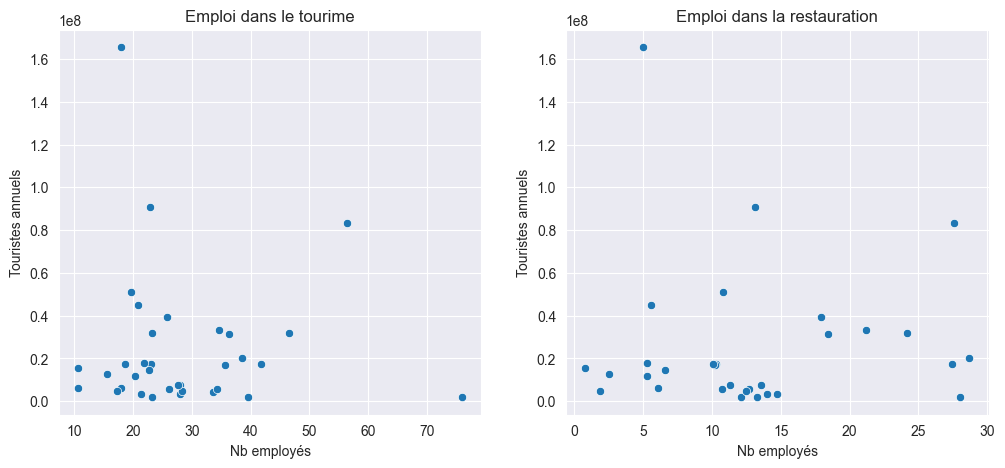

In [60]:
masque1 = df["Nombre d'employés dans le tourisme pour 1000 habitants"].notna()
masque2 = df["Nombre d'employés dans la restauration pour 1000 habitants"].notna()
touristes_par_tourisme = df.loc[masque1, ['Pays', 'Touristes annuels', "Nombre d'employés dans le tourisme pour 1000 habitants"]]
touristes_par_restauration = df.loc[masque2, ['Pays', 'Touristes annuels', "Nombre d'employés dans la restauration pour 1000 habitants"]]

#On va faire deux graphiques côte-à-côte
fig, axes = plt.subplots(1, 2, figsize = (12,5))

graphique4 = sns.scatterplot(data=touristes_par_tourisme, x="Nombre d'employés dans le tourisme pour 1000 habitants", y='Touristes annuels', ax = axes[0])
graphique4.set(xlabel = 'Nb employés', title = "Emploi dans le tourime")

graphique5 = sns.scatterplot(data=touristes_par_restauration, x="Nombre d'employés dans la restauration pour 1000 habitants", y='Touristes annuels', ax = axes[1])
graphique5.set(xlabel = 'Nb employés', title = "Emploi dans la restauration")


De ce qu'on peut voir, il n'y a pas de causalité apparente entre les deux, la distribution reste assez aléatoire même si on s'attendait plutôt au contraire car plus il y a de restaurants plus la culture du pays peut être mise en avant et donc attirer du monde. Regardons ceux de la France:

In [61]:
touri = df.loc[df["Nombre d'employés dans le tourisme pour 1000 habitants"].notna(), ['Pays', "Nombre d'employés dans le tourisme pour 1000 habitants"]]
touri = touri.set_index('Pays')
restau = df.loc[df["Nombre d'employés dans la restauration pour 1000 habitants"].notna(), ['Pays', "Nombre d'employés dans la restauration pour 1000 habitants"]]
restau = restau.set_index('Pays')
print('Employés tourisme /1000 habitants en France :', touri.loc['France']["Nombre d'employés dans le tourisme pour 1000 habitants"])
print('Employés restauration /1000 habitants en France :', restau.loc['France']["Nombre d'employés dans la restauration pour 1000 habitants"])

Employés tourisme /1000 habitants en France : 22.8
Employés restauration /1000 habitants en France : 13.1


Ces valeurs restent assez moyennes comparées aux autres pays, pour autant la France est considérée comme un des meilleurs pays gastronomiques (si ce n'est le meilleur) et possède un tourisme très important.

*Deux explications possibles* : 

* Le tourisme est seulement dû à l'attractivité de ses monuments et non à celui de ses services touristiques, ie. les gens viennent visiter par eux-mêmes, même si les employés ne sont pas extrêmement en grand nombre. Ou bien la qualité du service est bien meilleure sans pour autant avoir énormément  d'employés, mais il faudrait pour cela récupérer des données de sondage de satisfaction des visiteurs, ce qu'on n'a pas ici

* Même raisonnement pour les restaurants :

   1. En terme de nombre de restaurants : ce nombre d'employés ne reflète pas forcément le nombre de restaurants, car on peut faire tourner très correctement un restaurant avec moins d'employés si ceux-ci sont de qualité, ce qui ne permet en effet pas de mesurer correctement le nombre de restaurants français (pas explicitement proportionnels au nombre d'employés, car peu d'employés peuvent tenir une grande enceinte) ce qui explique le faible nombre d'employé en comparaison des touristes.
   2. En terme de qualité gastronomique : de même le nombre d'employé ne reflète pas non plus la qualité gastronomique du restaurant (qui dépend des qualités des cuisiniers...)

````{admonition}
En résumé les restaurants ne semblent pas être avoir d'impact direct sur l'attractivité cependant on peut remettre en question la façon d'associer nombre et qualité

### Des différences culturelles ?

Comparaison des déplacements à l'étranger par rapport aux déplacements internes au pays (ainsi que les séjours dans les hôtels)

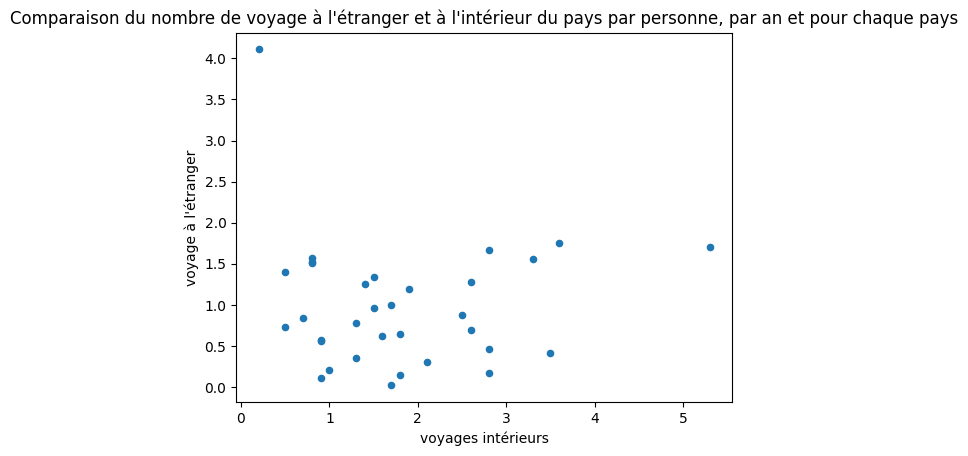

In [11]:
voyages=df.loc[df["Nombre de voyages des habitants dans un autre endroit du pays par an"].notna() & df["Nombre de départs à l'étranger par an pour 1000 habitants"].notna(), ["Nombre de départs à l'étranger par an pour 1000 habitants","Nombre de voyages des habitants dans un autre endroit du pays par an"]]
voyages["/1000"]=voyages["Nombre de départs à l'étranger par an pour 1000 habitants"]/1000
voyages.plot.scatter(x="Nombre de voyages des habitants dans un autre endroit du pays par an", y="/1000", title="Comparaison du nombre de voyage à l'étranger et à l'intérieur du pays par personne, par an et pour chaque pays", xlabel="voyages intérieurs", ylabel="voyage à l'étranger")
plt.show()

De ce graphique, on ne peut tirer  aucune corrélation entre le nombre de voyages à l'étranger et à l'intérieur du pays qu'effectuent les habitants de chaques pays.
Pourtant, ces differences ne doivent necessairement pas être liées à un quelconque manque de pouvoir d'achat, considérant le fait que, dans certains pays, les habitants partent plus à l'étranger (donc des destinations plus couteuses) que dans d'autres régions de leurs propres pays.
````{admonition}
On en déduit que le tourisme est un fait culturel, dépendant des moeurs de chaques pays.  

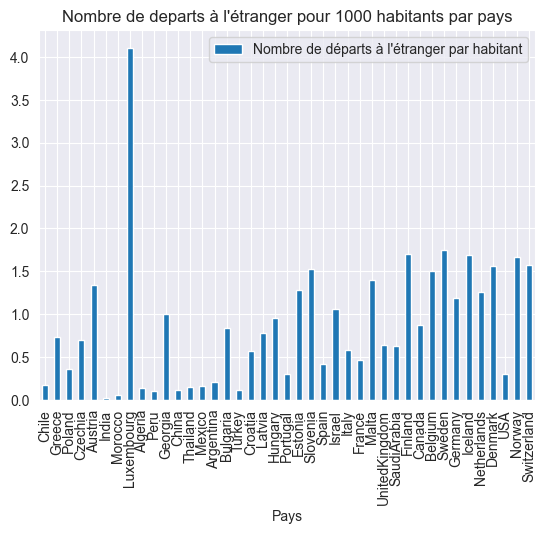

In [63]:
def histogramme(titre = None, X=None, Y=None, titrex=None, titrey=None, tri=None, glabel : list = None):
    L=[X,Y,tri]
    df1=df.loc[df[Y].notna() & df[X].notna(), L]
    if tri!=None:
        df1=df1.sort_values(by=tri)
    df1.plot.bar(x=X, y=Y, xlabel=titrex, ylabel=titrey, title=titre, label=glabel )
    plt.show()
df["Nombre de départs à l'étranger par habitant"]=df["Nombre de départs à l'étranger par an pour 1000 habitants"]/1000
histogramme(X="Pays", Y="Nombre de départs à l'étranger par habitant", titre = "Nombre de departs à l'étranger pour 1000 habitants par pays", titrex="Pays", tri="PIB / habitant")

On a ici ordonné les pays par ordre croissant de PIB/habitant. On remarque donc bien que le tourismes à l'étranger augemente globalement avec la richesse du pays. Ainsi, bien que le voyage et le tourisme soit un fait de société, c'est un fait permis par la richesse. 
Le tourisme est donc menacé en partie par une chute possible de l'économie mondiale, restreignant les voyages à l'étranger, et menaçant l'économie des pays hotes de tourismes comme la France. Pourtant, l'avenir du tourisme est positif à cours termes puisque même les recessions des dernieres années dûes au COVID, n'ont affecté que temporairement le tourisme. 

````{admonition}
Ceci prouve que tant que le tourisme et les voyages restent des faits de société, les variations économiques n'auront pas d'impacts longs sur le secteur touristique.

On peut alors s'intéresser de manière plus générale au transport par avion et les différentes spécificités que cela peut engendrer

### Lien entre le nombre de passagers aériens et le nombre de touristes annuels.

In [10]:
df1 = df[['Nombre de passagers aériens', 'Touristes annuels']]
df1.head()

,Nombre de passagers aériens,Touristes annuels
0,307741.0,6128000.0
1,6752002.0,NaN
2,19461376.0,NaN
3,76850600.0,NaN
4,46476600.0,31884000.0


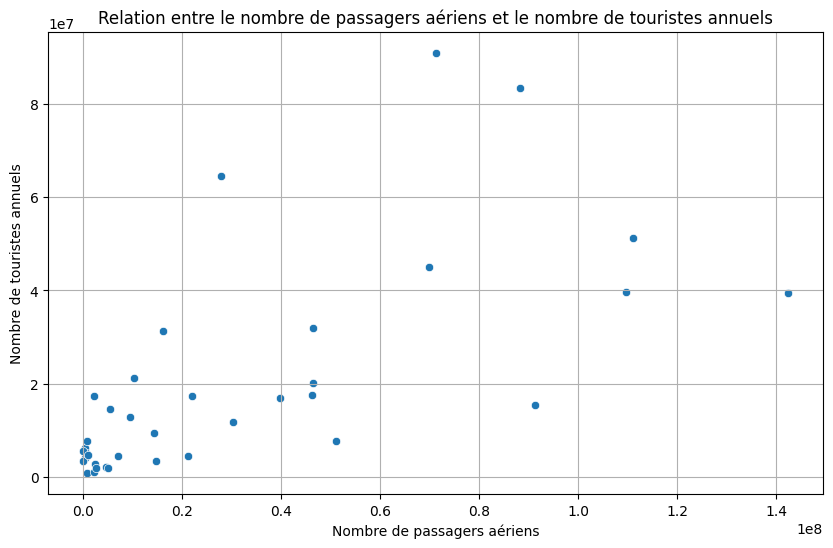

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nombre de passagers aériens', y='Touristes annuels', data=df1)
plt.title("Relation entre le nombre de passagers aériens et le nombre de touristes annuels")
plt.xlabel("Nombre de passagers aériens")
plt.ylabel("Nombre de touristes annuels")
plt.grid(True)
plt.show()

````{admonition}
On remarque que le nombre de touriste a tendance a augmenter avec le nombre de touristes annuels, et donc que ces pays sont très accessibles par avion ce qui permet d'avoir beaucoup de touristes.

### Analyse de la relation entre accessibilité aérienne et développement des infrastructures touristiques.


L'objectif ici est d'explorer la relation entre le nombre de passagers aériens et le nombre d'hôtes locaux et étrangers. Cette analyse peut montrer si les pays avec une meilleure accessibilité aérienne ont également des infrastructures hôtelières plus développées.

In [8]:
df2 = df[['Nombre de passagers aériens', 'Hôtes locaux (hôtels)', 'Hôtes étrangers (hôtels)']].dropna()


On ajoute une colonne pour le total des hôtes (locaux + étrangers).

In [9]:
df2['Total Hôtes (hôtels)'] = df['Hôtes locaux (hôtels)'] + df['Hôtes étrangers (hôtels)']

Analyse de la corrélation :

Corrélation entre passagers aériens et total des hôtes (hôtels) : 0.73


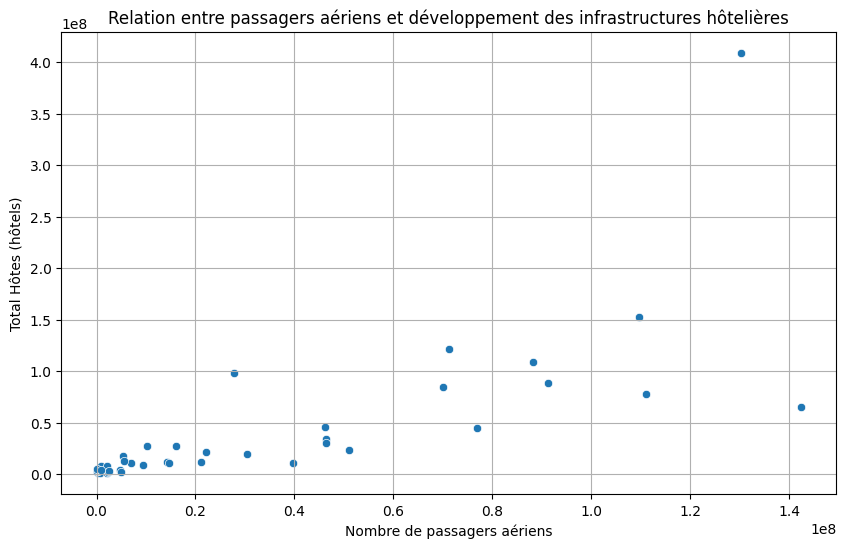

In [12]:

correlation = df2['Nombre de passagers aériens'].corr(df2['Total Hôtes (hôtels)'])
print(f"Corrélation entre passagers aériens et total des hôtes (hôtels) : {correlation:.2f}")

# Visualisation avec un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nombre de passagers aériens', y='Total Hôtes (hôtels)', data=df2)
plt.title("Relation entre passagers aériens et développement des infrastructures hôtelières")
plt.xlabel("Nombre de passagers aériens")
plt.ylabel("Total Hôtes (hôtels)")
plt.grid(True)
plt.show()

````{admonition}
On observe une corrélation positive (0.73) entre le nombre de passagers aériens et le développement des infrastructures hôtelières (total des hôtes locaux et étrangers). Cela suggère que les pays ayant une forte accessibilité aérienne tendent à avoir des infrastructures touristiques plus développées, indiquant une probable dépendance de ces pays à l'égard du tourisme aérien pour attirer des visiteurs.

## Étude comparative entre pays dépendants du transport aérien et non aérien

Pour cette analyse, nous allons créer deux groupes de pays :

- Groupe 1 : Pays ayant un fort nombre de passagers aériens.
- Groupe 2 : Pays ayant un fort nombre de voyages d'une seule journée depuis l'étranger.
  
Nous allons comparer certains indicateurs économiques pour ces deux groupes.

In [15]:
df = df[['Nombre de passagers aériens', 
         'Nombre de voyages d\'une seule journée depuis l\'étranger pour 1000 habitants',
         'Touristes annuels', 
         'Dépense étrangère dans le pays pour le tourisme ($US2021)',
         'PIB / habitant']].dropna()


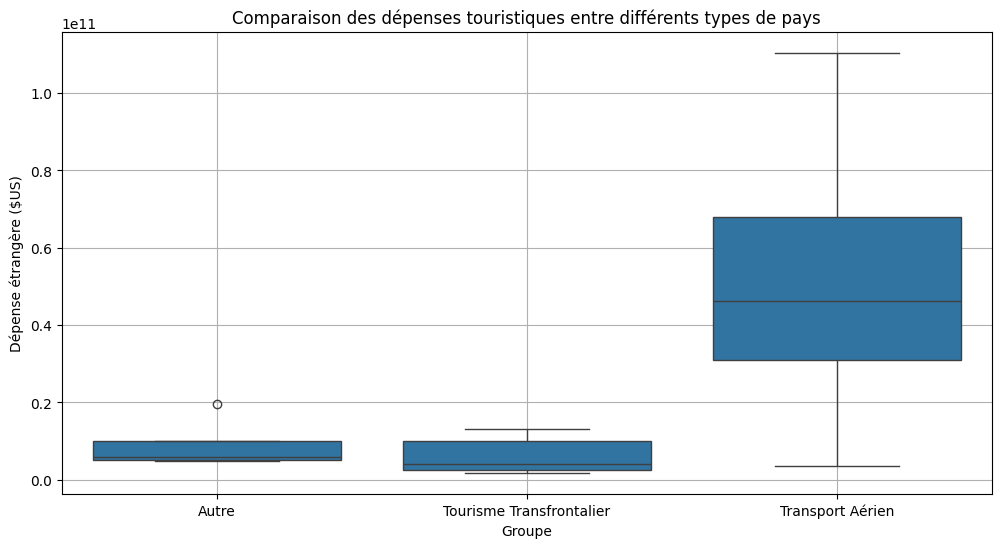

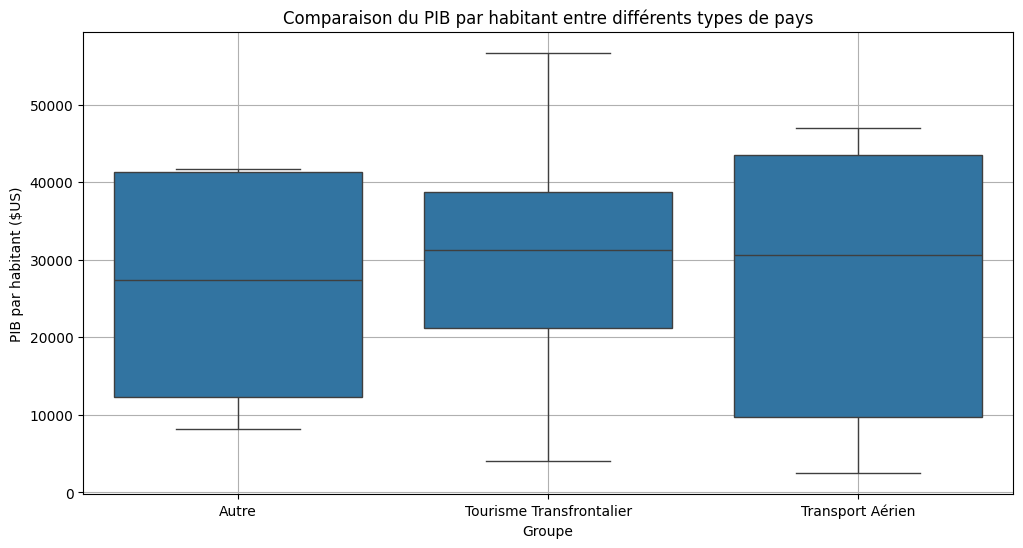

Groupe
Transport Aérien            12
Tourisme Transfrontalier     8
Autre                        4
Name: count, dtype: int64


In [16]:
threshold_air = df['Nombre de passagers aériens'].median()
threshold_day_trip = df['Nombre de voyages d\'une seule journée depuis l\'étranger pour 1000 habitants'].median()

# Créer deux groupes
df['Groupe'] = df.apply(lambda x: 'Transport Aérien' if x['Nombre de passagers aériens'] > threshold_air 
                        else 'Tourisme Transfrontalier' if x['Nombre de voyages d\'une seule journée depuis l\'étranger pour 1000 habitants'] > threshold_day_trip 
                        else 'Autre', axis=1)

# Comparer les indicateurs économiques entre les deux groupes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Groupe', y='Dépense étrangère dans le pays pour le tourisme ($US2021)', data=df)
plt.title("Comparaison des dépenses touristiques entre différents types de pays")
plt.ylabel("Dépense étrangère ($US)")
plt.grid(True)
plt.show()

# Analyse comparative du PIB par habitant
plt.figure(figsize=(12, 6))
sns.boxplot(x='Groupe', y='PIB / habitant', data=df)
plt.title("Comparaison du PIB par habitant entre différents types de pays")
plt.ylabel("PIB par habitant ($US)")
plt.grid(True)
plt.show()

# Afficher la répartition des groupes
print(df['Groupe'].value_counts())

````{admonition}
Les pays fortement dépendants du transport aérien ont des dépenses touristiques significativement plus élevées par rapport aux pays avec un tourisme transfrontalier ou d'autres types de tourisme. Cela indique que ces pays attirent des touristes qui dépensent davantage, probablement en raison de séjours plus longs ou de voyages plus coûteux.

````{admonition}
Les pays du groupe "Transport Aérien" montrent une large variabilité du PIB par habitant, mais en général, ils ont un PIB médian similaire voire supérieur à celui des autres groupes. Cela suggère que l'accessibilité aérienne peut être liée à un niveau économique plus élevé, soit en attirant des touristes de plus grande valeur ajoutée, soit en étant une conséquence du développement économique général.

## Disponibilité du voyage aérien

Le tourisme international s'est beaucoup développé grâce à la démocratisation de l'avion. La plupart des touristes utilisent ce moyen de transport pour traverser les frontières, qu'elles soient terrestres ou marines.

On va commencer par regarder s'il y a un lien entre le nombre d'habitants et le nombre de voyageurs aériens pour tous les pays.

In [73]:
sns.set_style('darkgrid')
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

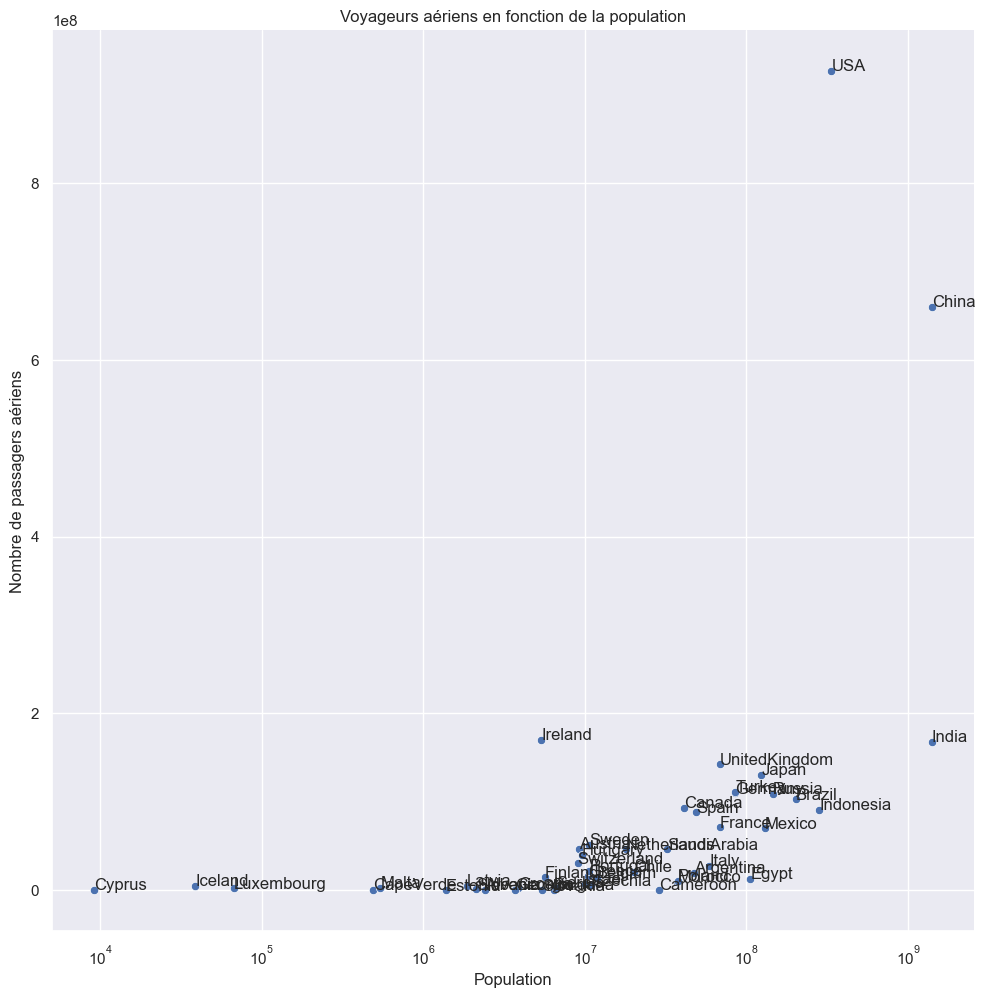

In [74]:
masque = (df['Touristes annuels'].notna()) & (df['Nombre de passagers aériens'].notna())
touristes_par_avion = df.loc[masque, ['Pays', 'Touristes annuels', 'Nombre de passagers aériens', 'PIB / habitant', 'Population']]


graphique = sns.relplot(data=touristes_par_avion, x='Population', y='Nombre de passagers aériens', height = 10)
graphique.set(xscale = 'log', title = "Voyageurs aériens en fonction de la population");

label_point(touristes_par_avion['Population'],touristes_par_avion['Nombre de passagers aériens'], touristes_par_avion['Pays'], plt.gca())

Cela semble être le cas puisqu'on obtient une courbe qui ressemble à une exponentielle, traduisant une relation linéaire entre nos deux paramètres.

L'avion est un moyen de transport qui nécessite d'importantes infrastructures. On peut donc imaginer que ce soit en priorité les pays les plus riches qui utilisent l'avion.

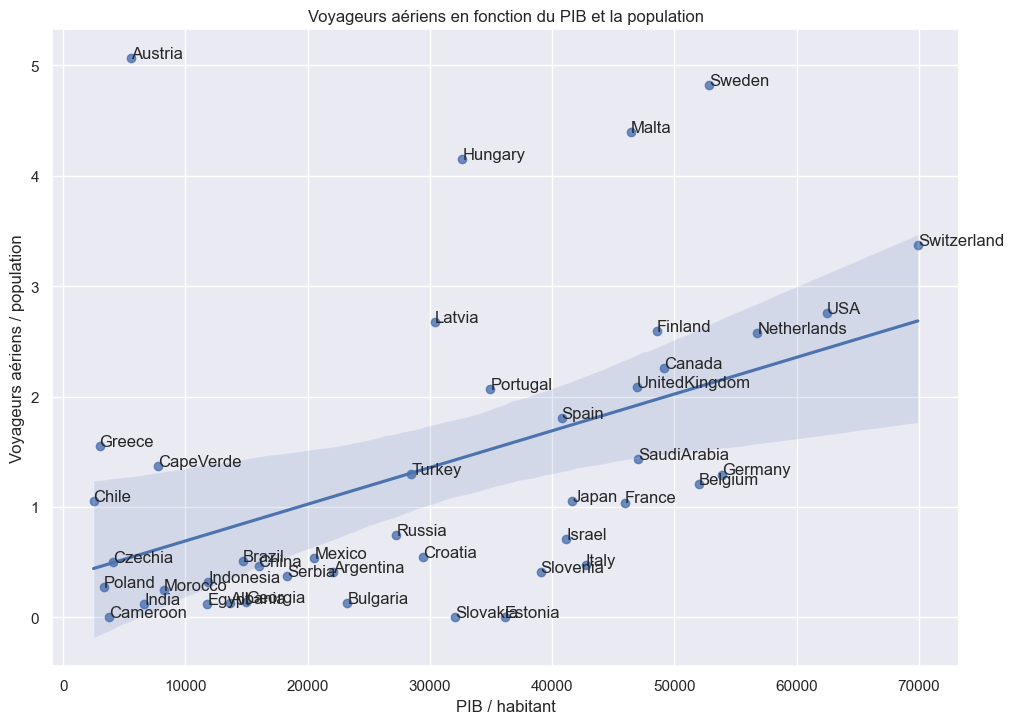

In [75]:
touristes_par_avion['Voyageurs aériens / population'] = touristes_par_avion['Nombre de passagers aériens'] / touristes_par_avion['Population']

#On élimine les pays avec trop de voyageurs aériens pour pouvoir visualiser correctement les autres
exclusion_pays = touristes_par_avion[(touristes_par_avion['Pays'] != 'Ireland') & (touristes_par_avion['Pays'] != 'Luxembourg') & (touristes_par_avion['Pays'] != 'Cyprus') & (touristes_par_avion['Pays'] != 'Iceland')]

graphique = sns.regplot(data=exclusion_pays, x='PIB / habitant', y='Voyageurs aériens / population')
graphique.set(title = "Voyageurs aériens en fonction du PIB et la population");

label_point(exclusion_pays['PIB / habitant'],exclusion_pays['Voyageurs aériens / population'], exclusion_pays['Pays'], plt.gca())


Lorsque le PIB par habitant d'un pays augmente, les habitants ont tendance à plus souvent prendre l'avion ;  et ce quel que soit le continent. L'avion est donc une caractéristique des pays les plus riches, mais est-ce que cela se reflète sur le tourisme ?

Plus d'avions vers un pays devrait vouloir dire plus de touristes ?

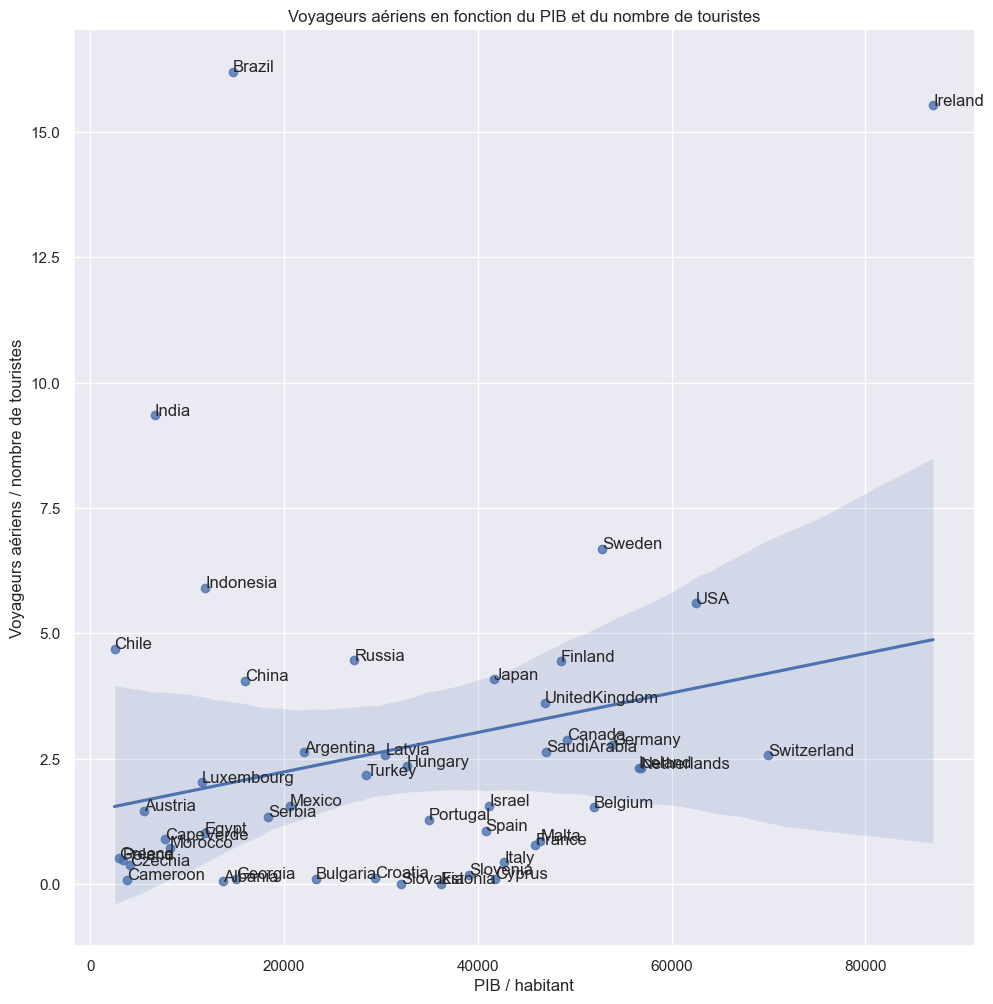

In [67]:
touristes_par_avion['Voyageurs aériens / nombre de touristes'] = touristes_par_avion['Nombre de passagers aériens'] / touristes_par_avion['Touristes annuels']

graphique = sns.lmplot(data=touristes_par_avion, x='PIB / habitant', y='Voyageurs aériens / nombre de touristes', height = 10)
graphique.set(title = "Voyageurs aériens en fonction du PIB et du nombre de touristes");

label_point(touristes_par_avion['PIB / habitant'],touristes_par_avion['Voyageurs aériens / nombre de touristes'], touristes_par_avion['Pays'], plt.gca())


Ici encore on obtient une fonction croissante du PIB par habitant.

Néanmoins, pour la majorité des pays, le nombre de voyages aériens est bien supérieur au nombre de touristes : il y a au moins deux fois plus de voyages en avion que de visiteurs annuels du pays.
On en déduit que le tourisme ne concerne finalement qu'une faible part du trafic aérien. L'essentiel de ce domaine est probablement liée au business.

````{admonition}
Il est donc difficile de tirer des conclusions sur le tourisme à partir de résultats sur les voyages en avion.

## Tourisme international et intranational

Dans cette partie, nous allons nous intéresser aux liens entre les différents pays dans le domaine du tourisme. 

Quels sont les pays qui dépendent le plus du tourisme ? Quels sont ceux qui y perdent de l'argent ? Certains pays sont-ils "auto-suffisants" dans ce domaine - ont-ils suffisamment de commerce uniquement avec leurs propres habitants ?

Dans le cadre de la crise liée à la pandémie de Covid-19, le secteur du tourisme a été particulièrement affecté par la suppression des trajets internationaux et/ou de longue distance. Pour survivre économiquement, les acteurs de ce secteur ont du compter sur un tourisme plus local, et notamment sur leurs propres compatriotes.


Commençons par regarder quels pays dépendent le plus des investissements étrangers liés aux tourismes.

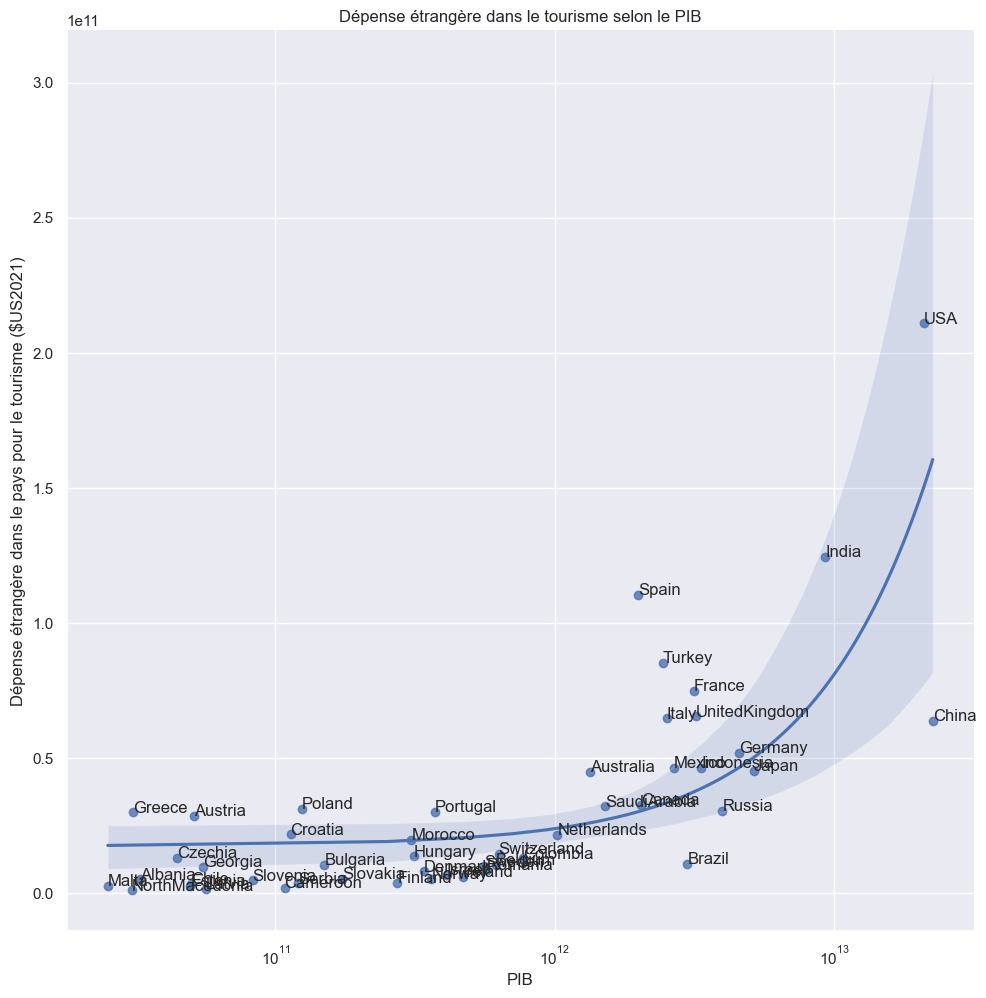

In [68]:
masque = (df['Dépense étrangère dans le pays pour le tourisme ($US2021)'].notna())
tableau = df.loc[masque, ['Pays', 'PIB / habitant', 'Population','Dépense étrangère dans le pays pour le tourisme ($US2021)']]

tableau['PIB'] = tableau['PIB / habitant'] * tableau['Population']

#On élimine les pays avec un PIB trop faible pour bien visualiser la courbe
investissements_etrangers = tableau[(tableau['Pays'] != 'CapeVerde') & (tableau['Pays'] != 'Luxembourg') & (tableau['Pays'] != 'Cyprus') & (tableau['Pays'] != 'Iceland')]

graphique = sns.lmplot(data=investissements_etrangers, x='PIB', y='Dépense étrangère dans le pays pour le tourisme ($US2021)', height = 10)
graphique.set(xscale = 'log', title = "Dépense étrangère dans le tourisme selon le PIB");

label_point(investissements_etrangers['PIB'], investissements_etrangers['Dépense étrangère dans le pays pour le tourisme ($US2021)'], investissements_etrangers['Pays'], plt.gca())


On retrouve une nouvelle relation linéaire.

````{admonition}
La France, la Turquie, l'Espagne, l'Italie et le Royaume-Uni se démarquent : ces pays reçoivent d'importantes sommes d'argent de l'étranger grâce à leur branche touristique.
Au contraire, le Brésil et la Chine en sont moins dépendants : leur économie est majoritairement fondée sur l'agriculture et l'industrie respectivement.
````
On peut aussi s'intéresser aux pays les plus généreux dans le tourisme :

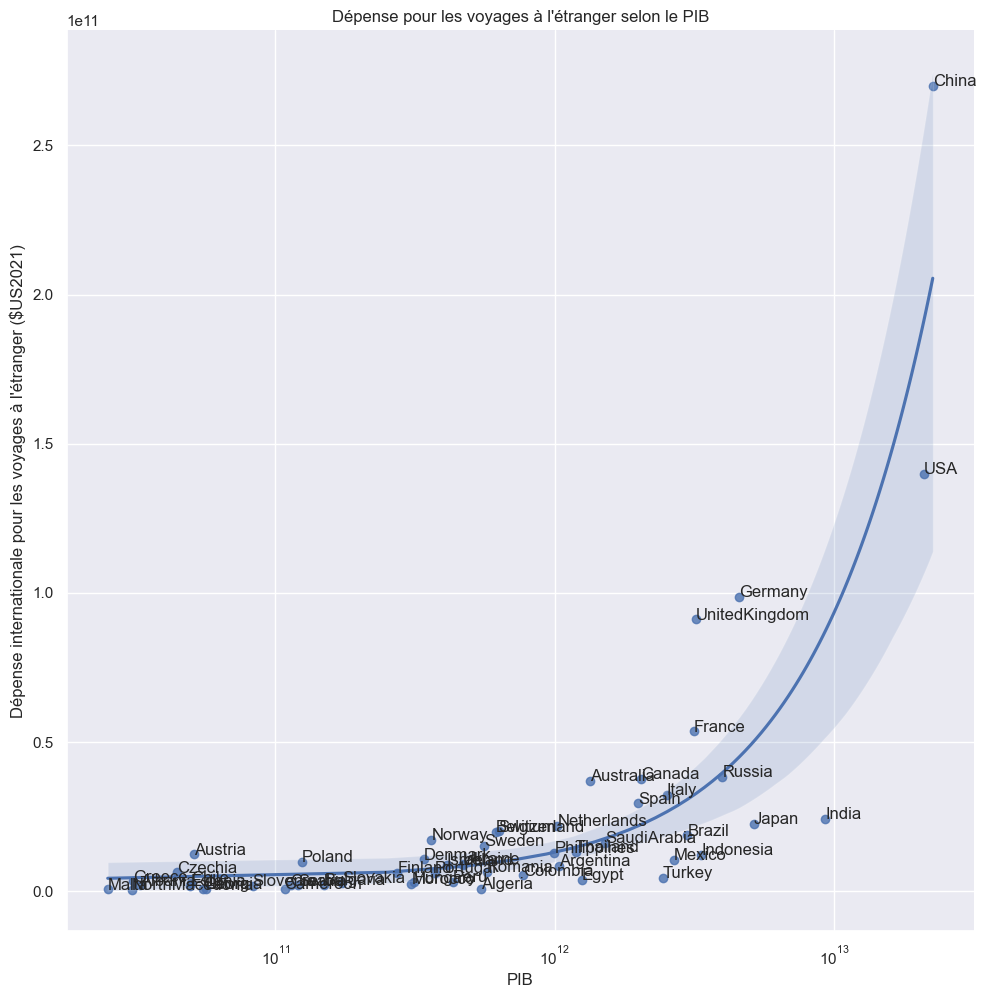

In [69]:
masque = df["Dépense internationale pour les voyages à l'étranger ($US2021)"].notna()
tableau = df.loc[masque, ['Pays', 'PIB / habitant', 'Population', "Dépense internationale pour les voyages à l'étranger ($US2021)"]]
tableau['PIB'] = tableau['PIB / habitant'] * tableau['Population']

#On élimine les pays avec un PIB trop faible pour bien visualiser la courbe
investissements_a_letranger = tableau[(tableau['Pays'] != 'CapeVerde') & (tableau['Pays'] != 'Luxembourg') & (tableau['Pays'] != 'Cyprus') & (tableau['Pays'] != 'Iceland')]

graphique = sns.lmplot(data=investissements_a_letranger, x='PIB', y="Dépense internationale pour les voyages à l'étranger ($US2021)", height = 10)
graphique.set(xscale = 'log', title = "Dépense pour les voyages à l'étranger selon le PIB");

label_point(investissements_a_letranger['PIB'], investissements_a_letranger["Dépense internationale pour les voyages à l'étranger ($US2021)"], investissements_a_letranger['Pays'], plt.gca())

Cette fois-ci, c'est l'Allemagne qui arrive en tête avec le Royaume-Uni, l'Australie, le Canada et la France. Ces pays ont beaucoup de citoyens qui partent à l'étranger et y dépensent de l'argent.

On peut aussi remarquer que la Chine et les USA ont quasiment échangé de place !

```` {admonition}
Ainsi l'Espagne et l'Italie mais surtout la Turquie ont des comptes positifs pour ce qui concernce le tourisme : il y a beaucoup plus d'investissement étranger que d'argent dépensé par la population.

Regardons la comparaison des deux critères pour tous les pays :

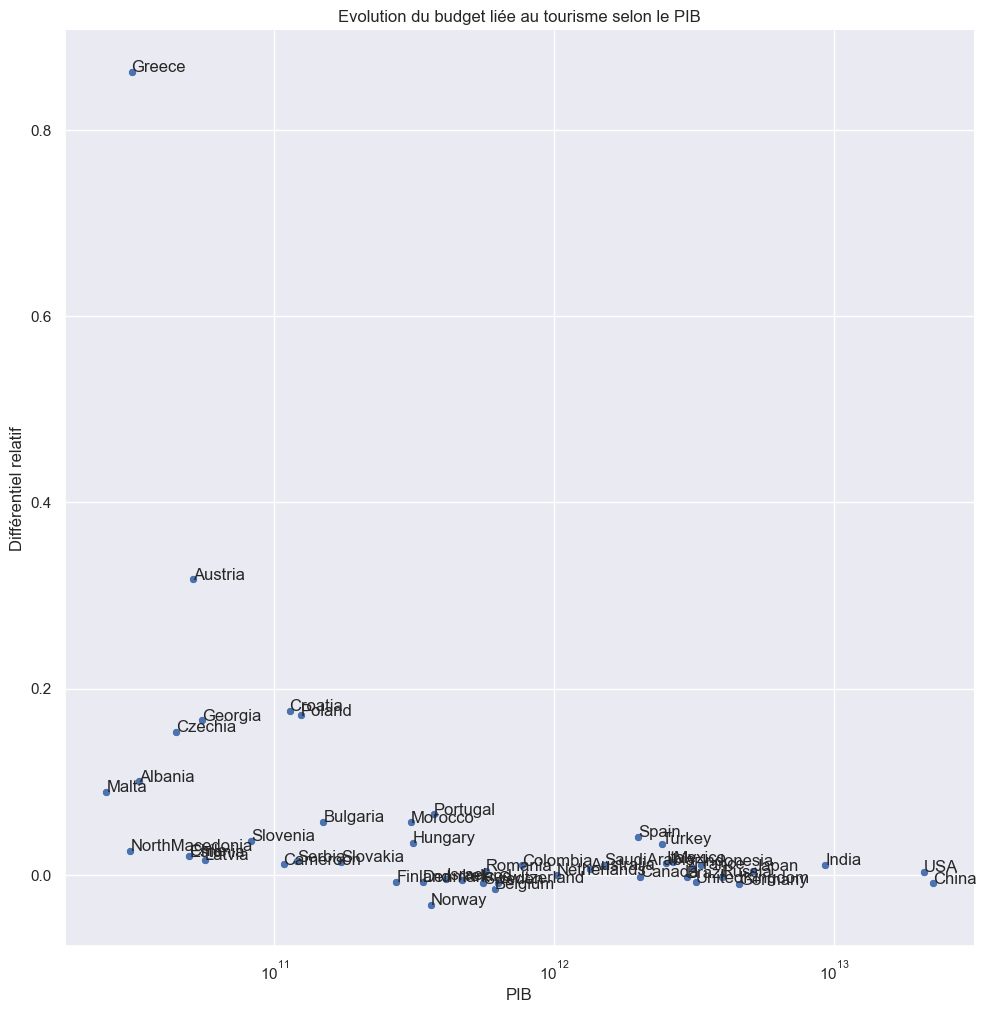

In [70]:
masque = (df["Dépense internationale pour les voyages à l'étranger ($US2021)"].notna()) & (df["Dépense étrangère dans le pays pour le tourisme ($US2021)"].notna())

tableau = df.loc[masque, ['Pays', 'PIB / habitant', 'Population', "Dépense internationale pour les voyages à l'étranger ($US2021)", "Dépense étrangère dans le pays pour le tourisme ($US2021)"]]
tableau['PIB'] = tableau['PIB / habitant'] * tableau['Population']
tableau['Différentiel relatif'] = (tableau['Dépense étrangère dans le pays pour le tourisme ($US2021)'] - tableau["Dépense internationale pour les voyages à l'étranger ($US2021)"]) / tableau['PIB']

#On élimine les pays avec un PIB trop faible pour bien visualiser la courbe
investissement_global = tableau[(tableau['Pays'] != 'CapeVerde') & (tableau['Pays'] != 'Luxembourg') & (tableau['Pays'] != 'Cyprus') & (tableau['Pays'] != 'Iceland')]

graphique = sns.relplot(data=investissement_global, x='PIB', y="Différentiel relatif", height = 10)
graphique.set(xscale='log', title = "Evolution du budget liée au tourisme selon le PIB");

label_point(investissement_global['PIB'], investissement_global["Différentiel relatif"], investissement_global['Pays'], plt.gca())

Sur ce dernier graphique, il apparaît clairement que la Grèce est le pays qui dépend le plus du tourisme étranger.

L'Autriche, la Croatie, la Pologne, la Géorgie, la Tchéquie sont également gagnants loersqu'on compare les recettes et les dépenses.

````{admonition}
Finalement, les gains constatés pour l'Espagne, les USA, la Turquie ne sont pas si conséquents : le tourisme est donc avant tout important pour les nations les plus petites.

Regardons maintenant dans quelle mesure le tourisme local pourrait jouer un rôle dans l'économie de certains pays.

On commence par observer quels flux de touristes on peut voir.

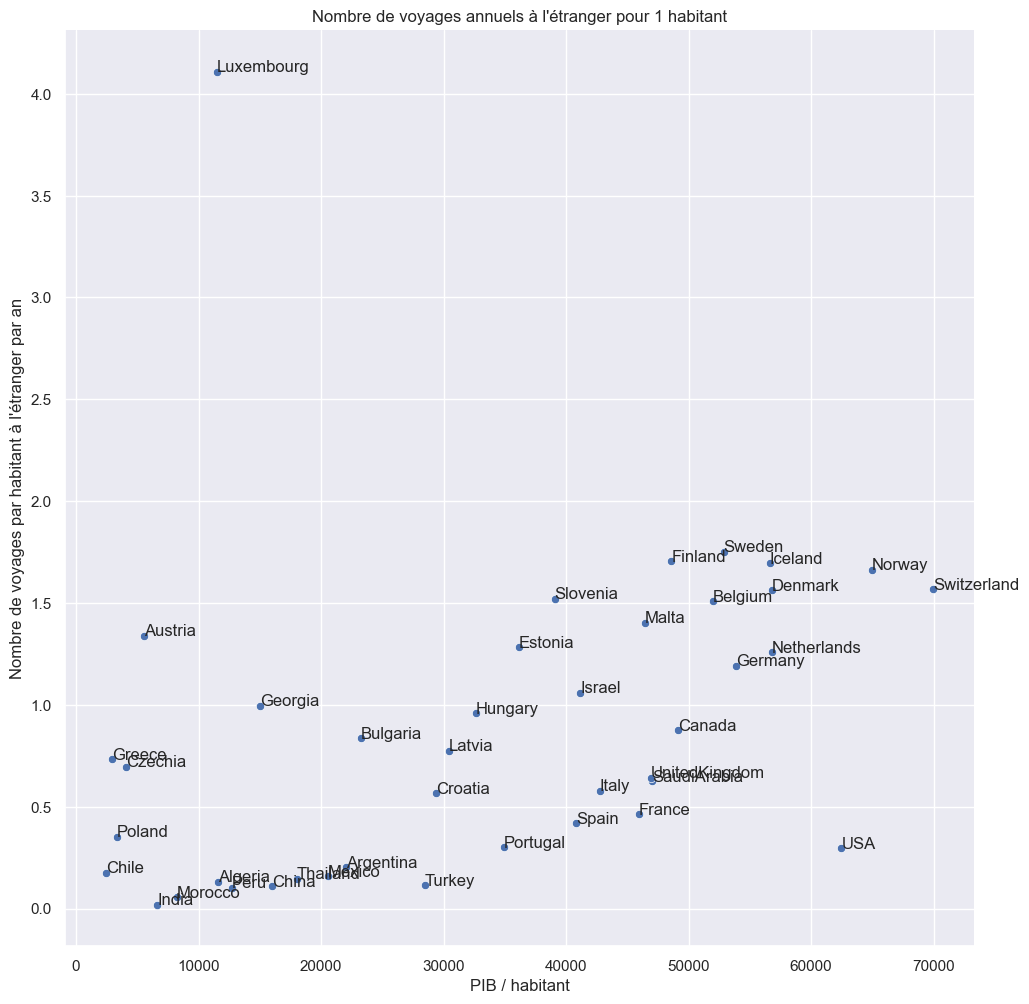

In [71]:
masque = (df["Nombre de départs à l'étranger par an pour 1000 habitants"]).notna()

voyages = df.loc[masque, ['Pays', 'PIB / habitant', "Nombre de départs à l'étranger par an pour 1000 habitants"]]
voyages["Nombre de voyages par habitant à l'étranger par an"] = voyages["Nombre de départs à l'étranger par an pour 1000 habitants"] / 1000

graphique = sns.relplot(data=voyages, x='PIB / habitant', y="Nombre de voyages par habitant à l'étranger par an", height = 10)
graphique.set(title = "Nombre de voyages annuels à l'étranger pour 1 habitant");

label_point(voyages['PIB / habitant'], voyages["Nombre de voyages par habitant à l'étranger par an"], voyages['Pays'], plt.gca())

On constate que la plupart des citoyens du monde ne quittent pas leur pays plus de 2 fois par an, à part pour des pays très petits comme le Luxembourg.

````{admonition}
Il semble y avoir une relation linéaire entre le nombre de voyages à l'étranger et le PIB / habitant ce qui semble naturel au vu des ressources nécessaires pour voyager en avion, en train
````

Les pays les plus "touristiques" tels que l'Espagne, la Turquie, la France, l'Italie comptent moins de départs à l'étranger que des pays similaires avec moins de touristes.

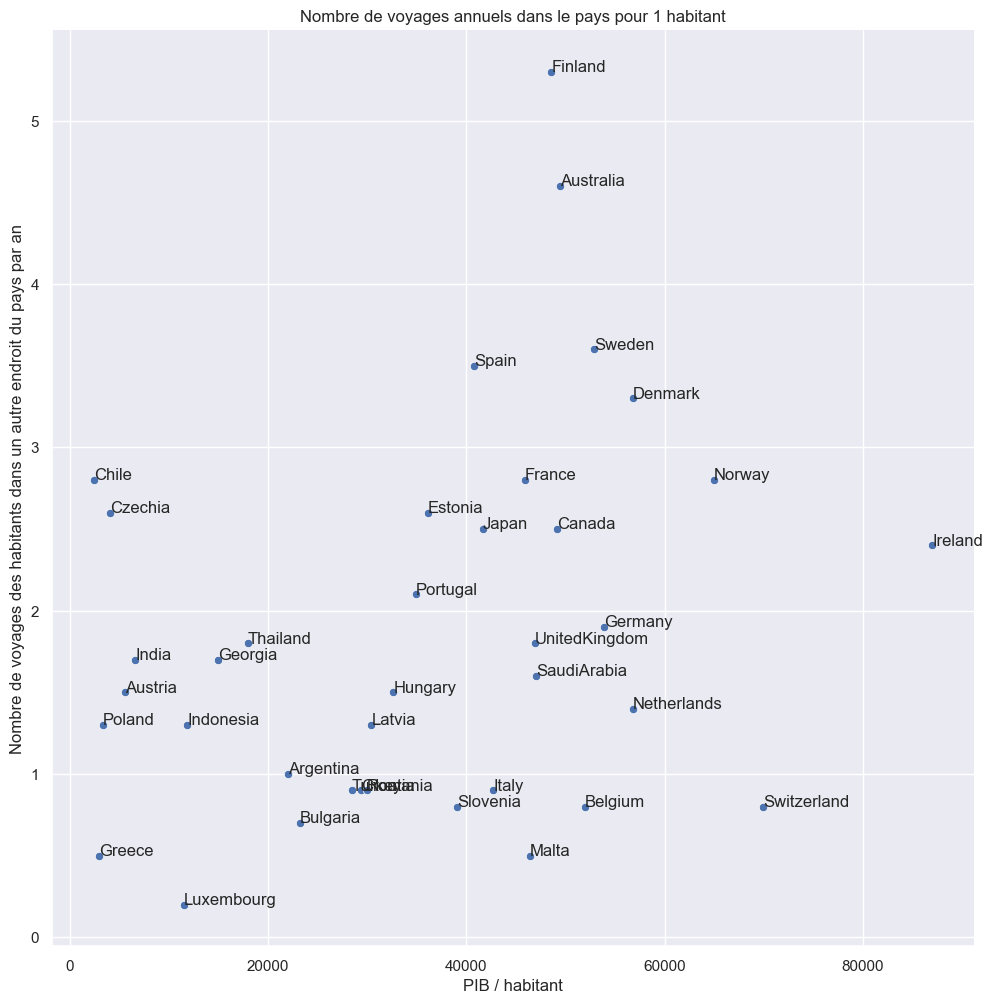

In [72]:
masque = (df["Nombre de voyages des habitants dans un autre endroit du pays par an"]).notna()

voyages = df.loc[masque, ['Pays', 'PIB / habitant', "Nombre de voyages des habitants dans un autre endroit du pays par an"]]

graphique = sns.relplot(data=voyages, x='PIB / habitant', y="Nombre de voyages des habitants dans un autre endroit du pays par an", height = 10)
graphique.set(title = "Nombre de voyages annuels dans le pays pour 1 habitant");

label_point(voyages['PIB / habitant'], voyages["Nombre de voyages des habitants dans un autre endroit du pays par an"], voyages['Pays'], plt.gca())

Le nombre annuel de voyages internes au pays varie selon les pays : au Luxembourg, il est très faible car les pays plus petits ne permettent pas aux habitants de voyager sans passer une frontière.

````{admonition}
La Finlande, l'Australie, la Suède, l'Espagne et le Danemark démontrent une grande mobilité des habitants au sein du pays. L'économie du tourisme devrait donc moins être affectée par les aléas internationaux dans ces pays puisque les habitants parviennent à contribuer au tourisme.
````

On peut remarquer que la Grèce, qui attire beaucoup d'étrangers, ne semble pas être attrayante pour ses propres habitants, tout comme la Turquie.

## Conclusion

### Eléments de réponse

Au travers de cette étude, on a pu observer différentes corrélations qui témoignent de divers paramètres touristiques.

En effet on a commencé par observer différents pays et leurs recettes, qui a démontré qu'il existaitu une part plus ou moins importante du PIB. Pour le cas de la France, pays reconnu pour son attractivité touristique, on remarque que le tourisme occupe une place centrale pour de larges taux d'emplois (de l'ordre de 20%) et de PIB (2% soit la dépense énergétique française). De cette façon les pays, et surtout la France, se reposent grandement sur ces recettes.

Cependant pour expliquer ce succès il a fallu s'intéresser à divers caractéristiques du pays au niveau des services touristiques (qualité de vie, richesse du pays, accès aérien...) mais aussi au niveau des services répondant aux besoins essentiels humains (restaurants, hôtels...). En effet selon les paramètres d'études, on retrouve parfois des corrélations qui semblent cohérentes, et d'autres auxquelles on aurait dû s'attendre mais qui ne se sont pas répercutées.

D'une manière générale ce qui compte le plus est également la culture du pays qui peut être plus ou moins attrayante et qui peut susciter des déplacements, d'autant plus que l'accès au pays dépend aussi des moyens des touristes. En effet peu de personne peuvent par exemple payer un billet d'avion pour aller dans des pays reculés, ce qui pourrait expliquer leur faible attractivité en dehors des hautes sphères sociales.

Finalement, si on revient du côté de la France on constate que le tourisme est un secteur essentiel à sa croissance économique. Celui-ci peut être optimisé au travers de divers paramètres précedemment étudiés (restaurants, hôtels, accès, opportunités géographiques, richesse du pays, culture du pays...) afin d'augmenter les recettes et l'attractivité, sans quoi un déclin touristique auraient de grave conséquences sur l'économie française. Le but serait alors de développer de l'information autour des services proposés par le pays notamment au travers des réseaux ou de pubs internationales, afin de donner envie aux populations étrangères, tout en adaptant de pair les infrastructures sur place.

### Axes d'approfondissement 

* On pourrait étendre l'étude comme évoqué rapidement au-dessus en récupérant des données d'avis/ressentis des touristes. En effet le plus parlant ne sont pas forcément les chiffres mais également les commentaires/retours des touristes, qui permettront de juger de l'importance de la disponibilité en hôtels, en restauration, en qualité de vie, en qualité de nourriture ou encore en qualité de service tertiaire lié au tourisme.

    Pour cela on pourrait se baser sur des notes données par les concernées (par exemple la moyenne des étoiles données sur des sites de référencement comme Google, TripAdvisor... tant que les données sont fiables) ou encore même aller plus loin en exploitant les commentaires associés en utilisant des prgorammes de MachineLearning ou de traitement de texte parmi une selection de mots plus ou moins positifs (correct, bien, excellent, parfait...) afin d'en tirer un avis encore plus précis sur nos différents critères (prix, nourriture, hôtels...)

* L'autre possibilité serait évidemment de compléter la base de données avec des colonnes supplémentaires telles que les capacités portuaires, les possibilités de location de véhicules, les températures, les saisons d'affluence (connaître les secteurs d'attractivité principaux : plutôt le ski ou le surf) etc.. Car en effet on a fait beaucoup d'analyse sur le transport aérien, qui ont plus ou moins conclu, mais qui pourraient encore être améliorées pour adapter des modèles plus cohérents. De la même façon on pourrait également considérer les acès portuaires, routiers, ferroviaires et étudier les moyens financiers de ceux qui choisissent ce mode de transport

* Finalement il ne faut pas non plus oublier un aspect essentiel quand on parle de tourisme : l'environnement. En effet tous ces secteurs d'activités engendrent beaucoup de pollution et de déchets, et la problématique instrinsèque liée à ce domaine serait à traiter de manière parallèle à ce sujet, même si elle n'était pas présente ici. On pourrait alors prolonger les observatiosn déjà faites pour en tirer des conclusions sur le sujet, afin de peut-être optimiser l'attractivité selon des paramètres non juste touristiques mais également respecteux de l'environnement.

## Difficultés rencontrées

#### La table de données

Pour recueuillir ces informations, il a fallut tirer de nombreux chiffres de différents tableaux (voir la source qui permet de télécharger donnée par donnée, donc pour avoir PIB, employés et nombre de touriste on doit combiner 3 feuilles par exemple). 

Cela nous a bloqué pendant un long moment avant de pouvoir avancer, car des fois on avait une feuille avec certains pays puis la feuille d'après sans ces pays et il fallait arriver à tout remettre en une feuille, tout en gardant les correspondances. 

Pour ce faire on a gardé une liste définie de pays (pertinents) dont on a fusionné les tables en manipulant excel (non sans problèmes, et recherche d'aide sur internet pour remettre en face des bonnes lignes/colonnes les bonnes données). Le tout nous a fait perdre beacuoup de temps mais une fois qu'on avait une table saine (cf le fichier) on a pu commencer à travailler, ce qui fut le problème le plus stressant et qui a pris le plus de temps.

#### La légende des points

Pour ce qui est de la description des points pays par pays sur un graphique on a fait appel à la fonction 'label_point' qui a due être trouvée sur internet, ne connaisant pas les manipulations techniques nécessaires à sa réalisation avec seaborn. 

Le résultat est satisfaisant quoique un peu brouillon par moment, mais permet au moins de repérer les points phares (comme la France) en dehors de la masse de points.

#### L'erreur de 'finite values' à l'exécution des hôtels

Erreur incomprise, qui n'influe pas sur le résultat du graphe final (le programme tourne quand même). Mais comme dit précédemment (la fonction 'label_point' étant guidée par internet) il en est difficile de trouver comment la corriger car il n'y a pas de raison apparente d'avoir des valeurs 'non finies', tout autant que tout le reste se passe bien quand on fait appel à la fonction.

#### Problèmes techniques

Certains de nos PC protables ont eu des problèmes : entre un ordinateur qui ne faisait que crasher (et dont on a dû tout réinstaller) et l'autre dont le jupyter ne tournait pas, il a été difficile de s'organiser pour répartir les tâches comme certains ne pouvaient pas encore travailler dessus. Il a donc fallu réinstaller les modules à la main afin de pouvoir ensuite travailler dans de bonnes conditions